<b><u>Bibliotecas utilizadas</b></u>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from geopy.geocoders import Nominatim

<b><u>O objetivo</b></u>

Tivemos um ataque na loja e o objetivo final da equipe é criar/melhorar um modelo que consiga conter o ataque caso tenhamos dados suficientes para a execução dessa tarefa, mas até lá, você precisa atuar rapidamente encontrando uma solução que ajude a estancar o ataque, para isso será necessário usar os dados a seu favor para encontrar a melhor solução. 

<b><u>Os dados</b></u>

Na planilha `Teste_Konduto123_1.xlsx`, você encontrará os dados transacionais relacionados ao ataque. Com isso, precisamos que você olhe e nos traga insumos sobre: 


# Quantos % das vendas foram aprovadas pelo sistema? 

OBS: Nesse caso, a recomendação é o que o modelo propõe e o status é a decisão final, que pode ser influenciado por regras por exemplo: Modelo aprovou, mas existia uma regra de valor que tem intuito para negar, então o pedido será negado. Mas nem sempre o status é baseado por regra, pode ser baseado como o status da decisão do modelo também, por exemplo: Recomendação: Aprovado e Status Aprovado. 

In [2]:
df = pd.read_excel('Teste_Konduto123_1.xlsx')

In [3]:
total = df.shape[0]

In [4]:
df['recomendação'].unique()

array(['decline', 'approve'], dtype=object)

In [5]:
df['status'].unique()

array(['declined', 'approved'], dtype=object)

In [6]:
mask = (df['recomendação'] == 'approve') & (df['status'] == 'approved')
aprovados = df[mask].shape[0]

In [7]:
print('% de aprovados pelo sistema:', aprovados/total*100)

% de aprovados pelo sistema: 7.6


# Qual a taxa % de tentativa de fraude que foi barrado? 

Aqui, você precisa encontrar o perfil da fraude para encontrar o % de tentativa de fraude barrado. 


In [8]:
df['status'] = df['status'].replace('approved','0').replace('declined','1').astype(int)

In [9]:
mask_rep = (df['recomendação'] == 'decline')
reprovados = df[mask_rep].reset_index(drop=True)
reprovados

,data_pedido,order_id,recomendação,status,valor,score,ip,email,nome,device_id,telefone,endereço,CEP,cidade,estado
0,2020-04-26,1,decline,1,335.16,0.00,NaN,aaraonovaes23@gmail.com,Aarão Novaes,NaN,5568229838958,Rua B - Loteamento Altos do São Gonçalo,78094628,Cuiabá,MT
1,2020-04-27,2,decline,1,13.18,0.22,NaN,aarotfruf4omhairp5dd0n8h3n6al@yahoo.com,Abel Motta,NaN,554068852436191,Praça General Araripe de Faria - Vila Gomes,5590020,São Paulo,SP
2,2020-04-27,3,decline,1,13.18,0.90,NaN,oh54fdhara0dornaurftni8a6ml3p@yahoo.com,Abel Palmeira,NaN,550897009993889,Praça General Araripe de Faria - Vila Gomes,5590020,São Paulo,SP
3,2020-05-04,4,decline,1,13.18,0.96,NaN,swwyuj5fxegudyiktkhbcfee8d7wi8@yahoo.com,Abel Thomé,NaN,557373826060780,Praça General Araripe de Faria - Vila Gomes,5590020,São Paulo,SP
4,2020-05-01,5,decline,1,96.97,0.00,NaN,abelvillegas@gmail.com,Abel Villégas,NaN,557176579579867,Rua Dom Pedro I - Nova Itapira,13974250,Itapira,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
457,2020-05-04,630,decline,1,21.25,0.50,NaN,etwdbeui8shwduyckfjg7ey8ikx5fw@yahoo.com,Jonas Souza,NaN,5504445868915,Praça General Araripe de Faria - Vila Gomes,5590020,São Paulo,SP
458,2020-04-24,631,decline,1,22.85,0.65,NaN,nokef19470@itiomail.com,Jordana Aires,NaN,55461658545670,Avenida Presidente Tancredo Neves - Jabotiana,49095000,Aracaju,SE
459,2020-04-28,632,decline,1,21.26,0.62,NaN,s3fgrh8pju0ceheeb47@yahoo.com,Jordana Godinho,NaN,557498300858448,Praça General Araripe de Faria - Vila Gomes,5590020,São Paulo,SP
460,2020-04-24,633,decline,1,41.33,0.57,NaN,nokef8924@itiomail.com,Jordana Mieiro,NaN,55040563049405,Avenida Presidente Tancredo Neves - Jabotiana,49095000,Aracaju,SE


In [10]:
reprovados['nome1'] = "Nome"
for nome in range(0,462):
    reprovados['nome1'][nome] = reprovados['nome'][nome].split(' ')[0]

C:\Users\yukar\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [39]:
fraude = pd.DataFrame(data={'nome': reprovados['nome1'], 'CEP': reprovados['CEP'], 'endereço': reprovados['endereço'], 
                            'cidade':reprovados['cidade '], 'status':reprovados['status']}).drop_duplicates().reset_index(drop=True)

In [40]:
fraude

,nome,CEP,endereço,cidade,status
0,Aarão,78094628,Rua B - Loteamento Altos do São Gonçalo,Cuiabá,1
1,Abel,5590020,Praça General Araripe de Faria - Vila Gomes,São Paulo,1
2,Abel,13974250,Rua Dom Pedro I - Nova Itapira,Itapira,1
3,Abraão,22790701,Avenida das Américas - Recreio dos Bandeirantes,São Paulo,1
4,Abraão,5590020,Praça General Araripe de Faria - Vila Gomes,São Paulo,1
...,...,...,...,...,...
411,Jonas,5590020,Praça General Araripe de Faria - Vila Gomes,Piracicaba,1
412,Jonas,5590020,Praça General Araripe de Faria - Vila Gomes,São Paulo,1
413,Jordana,49095000,Avenida Presidente Tancredo Neves - Jabotiana,Aracaju,1
414,Jordana,5590020,Praça General Araripe de Faria - Vila Gomes,São Paulo,1


Ao analisar os dados, podemos observar que há muitos CEPs repetidos e/ou com nomes repetidos. Então ao pegar os números dos CEPs repetidos (até porque quando efetuamos a compra, temos que inserir o endereço de entrega e se for diferente, será entregue em locais diferentes) podemos enxergar a taxa de tentativa de fraudes.

In [41]:
fraude_rep = fraude['CEP'].unique().shape[0]

In [42]:
print('Taxa % de tentativa de fraude :', fraude_rep/total*100)

Taxa % de tentativa de fraude : 16.2


# Se nao tomarmos ações, qual seria a taxa % de chargeback da loja? 

Assumindo que as fraudes tivessem passado e sido aprovadas pelo modelo ou regras, qual seria o % de chargeback dessa loja? 


In [43]:
charge = fraude['CEP'].shape[0]

In [44]:
print('Taxa % de chargeback :', charge/total*100)

Taxa % de chargeback : 83.2


# Qual a taxa de falso positivo que barramos? 

Falso positivo é tudo aquilo que negamos e que teria potencial de ser o cliente, ou seja, sua tarefa é encontrar o % desses clientes barrados erroneamente. 


In [45]:
aprovados = df[mask].reset_index(drop=True)
aprovados['nome1'] = "Nome"
for nome in range(0,38):
    aprovados['nome1'][nome] = aprovados['nome'][nome].split(' ')[0]

C:\Users\yukar\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [46]:
aprov = pd.DataFrame(data={'nome1': aprovados['nome1'], 'CEP': aprovados['CEP'], 'aprovados':'aprovados'})

In [47]:
df_inner = pd.merge(reprovados, aprov, on=['CEP','nome1'], how='inner')

In [48]:
falso = df_inner.shape[0]
total_rep = reprovados.shape[0]

In [49]:
print('Taxa % de falso positivo :', falso/total_rep*100)

Taxa % de falso positivo : 1.2987012987012987


# Formule uma resposta explicando o perfil do ataque observado para o cliente (Lojista: Konduto123).


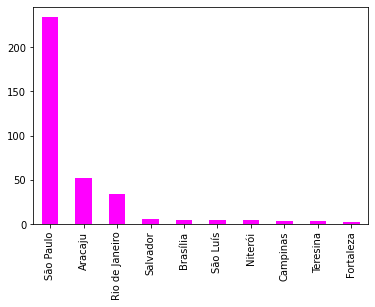

In [59]:
pd.Series(fraude['cidade']).value_counts().head(10).plot(kind='bar', color='magenta')

In [60]:
fraude['cidade'].value_counts()

São Paulo           234
Aracaju              52
Rio de Janeiro       34
Salvador              6
Brasília              5
                   ... 
Itabira               1
São Bento do Sul      1
Gravataí              1
Lençóis Paulista      1
Janaúba               1
Name: cidade, Length: 66, dtype: int64

<b>Ao analisar o gráfico e a tabela acima, podemos observar que os principais ataques estão vindo da cidade São Paulo, totalizando 234 ataques.<b>

# O que a querie abaixo fará? Faça uma simulação do resultado dela com 20 linhas de dados. 

In [23]:
select ROW_NUMBER() OVER(ORDER BY tl.loja_name asc) AS "Linha",
tl.loja_name as "Nome da Loja",
        calcs.loja_id,
        calcs."Transações Hoje",
        calcs."Transações D-1º dia",
        calcs."Variação % D0 vs D-1",
        calcs."Transações Semana Atual",
        calcs."Transações Semana-1",
        calcs."Variação % S0 vs S-1"
        from (select loja_id,
                     D0 as "Transações Hoje",
                     D1 as "Transações D-1º dia",
                     (D0 - D1) as "Dif D0 - D1",
                     (case when D1 = 0 then null else D1 end) as "If D1 0 = null",
                     ("Dif D0 - D1"::float/"If D1 0 = null")*100  as "Variação % D0 vs D-1",
                     S0 as "Transações Semana Atual",
                     S1 as "Transações Semana-1",
                     (S0 - S1) as "Dif S0 - S1",
                     (case when S1 = 0 then null else S1 end) as "If S1 0 = null",
                     ("Dif S0 - S1"::float/"If S1 0 = null")*100  as "Variação % S0 vs S-1"
                     from (select loja_id,
                               sum(case when data_criação_pedido BETWEEN (getdate() - INTERVAL '1 day') and (getdate() - INTERVAL '0 day') then 1 else 0 end) D0,
                               sum(case when data_criação_pedido BETWEEN (getdate() - INTERVAL '2 day') and (getdate() - INTERVAL '1 day') then 1 else 0 end) D1,
                               sum(case when data_criação_pedido BETWEEN (getdate() - INTERVAL '7 day') and (getdate() then 1 else 0 end) S0,
                               sum(case when data_criação_pedido BETWEEN (getdate() - INTERVAL '14 day') and (getdate() - INTERVAL '7 day') then 1 else 0 end) S1
                        from tabela_pedidos
                        join  (select loja_id as loja,
                                count(*) as num_pedidos
                                from tabela_pedidos 
            					where status_id = 300 -- Nº 300 é o ID de aprovação 
            					and data_criação_pedido > getdate() - interval '15 day'
            					group by loja
            					order by num_pedidos desc
            					limit 200
            				  ) geral on geral.loja = tabela_pedidos.loja_id
                        where data_criação_pedido > (getdate() - interval '15 day')
                        group by loja_id
                        ) AS stats
                ) AS calcs 
join tabela_lojas tl on tl.loja_id = calcs.loja_id
order by "Variação % D0 vs D-1" desc

SyntaxError: invalid syntax (<ipython-input-23-ec49f5249486>, line 1)

In [ ]:
tabela_pedidos = 

# Como Analistas de Dados, precisamos estar em contato direto com diferentes estilos de dados de origem, com diferentes tipos de formatação. Suponha que você acabou de receber o arquivo CSV abaixo de um Business Analyst, contendo uma relação transacional com os IDs de pedidos, a loja inerente a estes pedidos e o Valor de tais transações. Utilizando a biblioteca Pandas do Python, descreva um código que poderia ser utilizado para efetuar a leitura correta dos dados, tendo em vista que os IDs deverão ser entendidos como caracteres (Strings) e os valores como valores decimais."
